In [1]:
import sys
sys.path.append('/home/kal/TF_models/bin/')
import numpy as np
import matplotlib.pyplot as plt
import eval_TFmodel
import sequence
import train_TFmodel
import viz_sequence
import helper

Using TensorFlow backend.
/home/kal/TF_models/bin/sequence.py:275: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(dist))


In [2]:
sigmodel = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_classifier/20170919_sigmoid_model/')
seq = train_TFmodel.random_seq()
seq = sequence.SeqDist(helper.softmax(3*seq.seq + 1))

In [3]:
# types of dreams:
#standard: update is average gradient @ base * p(base) * step
#adversarial: update is standard - 1/10 * step
#blocked: dream only outside the pwm region (should I allow the max pwm to move around? doesn't currently.)
#constrained: dream orthogal to the pwm score (DOESN'T WORK)
#strict: gradients only apply to a base if that base was in the discrete sequence chosen. 

step: 331.565758845
initial sequence


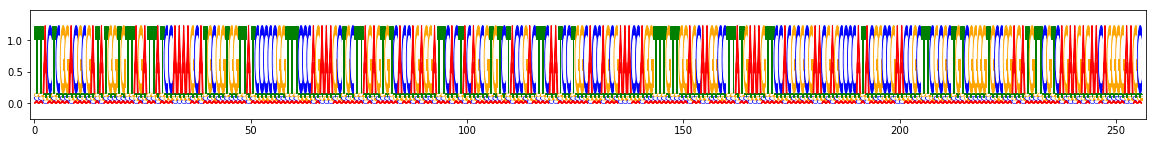

Bias Activation: -2.0073633194
Model Prediction: 0.0630949
Masked average prediciton difference


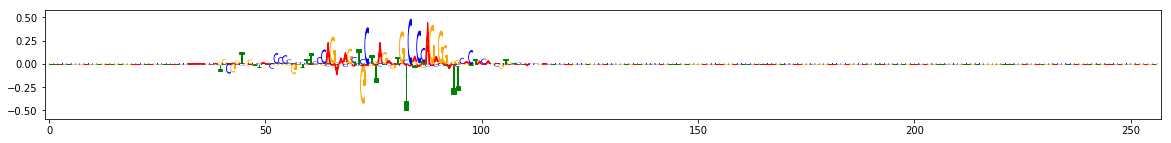

Information Content of Softmax prediction difference


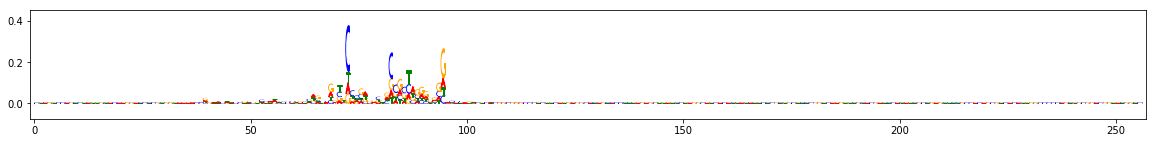

Weighted log-odds of the Sequence Distribution


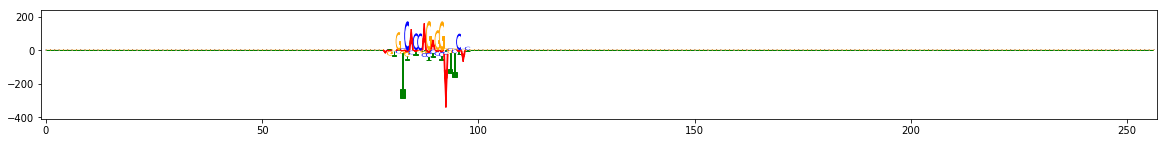

PWM score: -39.473988407
final sequence


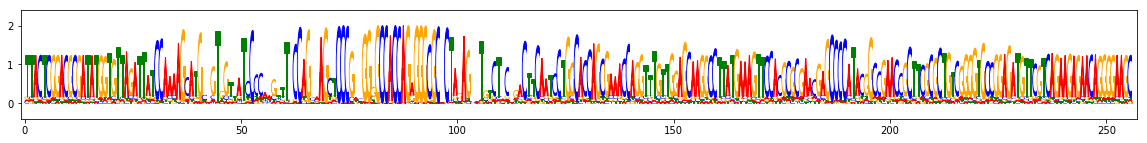

Bias Activation: 17.0643081665
Model Prediction: 1.0
Masked average prediciton difference


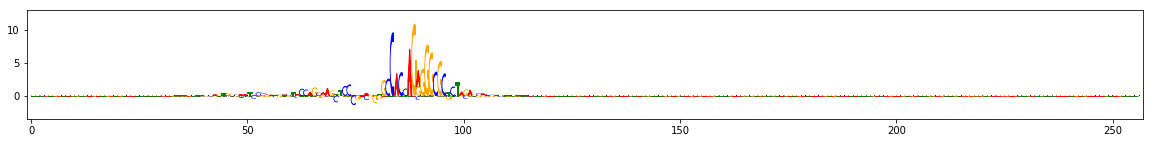

Information Content of Softmax prediction difference


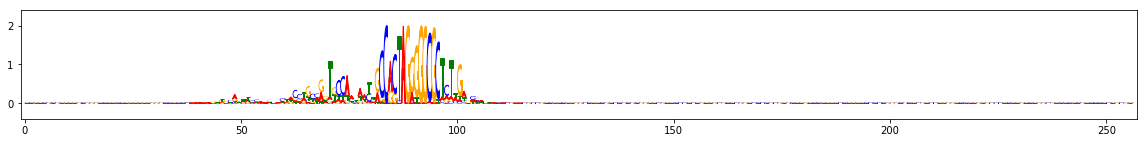

Weighted log-odds of the Sequence Distribution


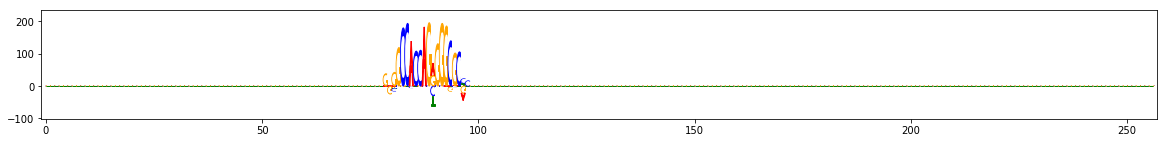

PWM score: 2107.03825335


In [4]:
dream = sigmodel.dream(seq, viz=False, num_iterations = 40)

print('initial sequence')
seq.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(seq)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(seq.discrete_seq()))[0][0]))
sigmodel.get_importance(seq, viz=True)
print('PWM score: ' + str(seq.find_pwm(viz=True)[2]))

print('final sequence')
dream.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(dream)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(dream.discrete_seq()))[0][0]))
sigmodel.get_importance(dream, viz=True)
print('PWM score: ' + str(dream.find_pwm(viz=True)[2]))

initial sequence


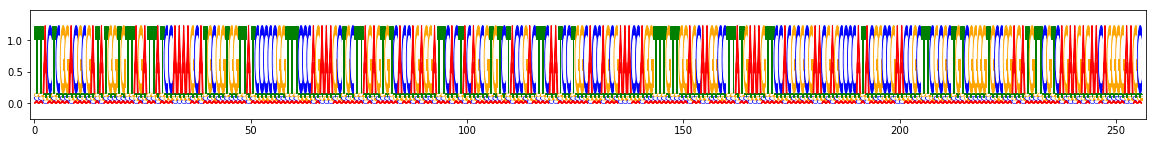

Bias Activation: -2.15656089783
Model Prediction: 0.057481
Masked average prediciton difference


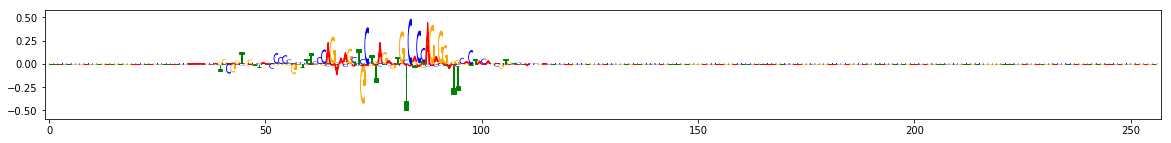

Information Content of Softmax prediction difference


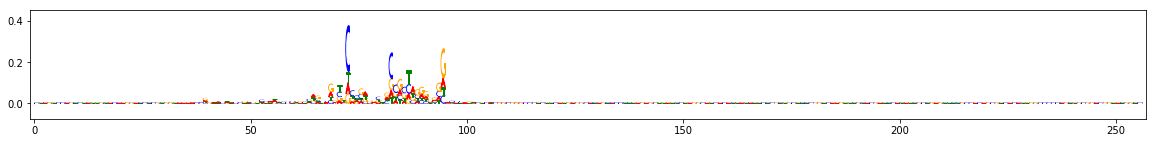

Weighted log-odds of the Sequence Distribution


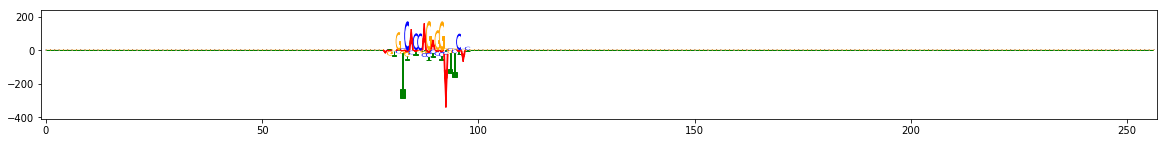

PWM score: -39.473988407
final sequence


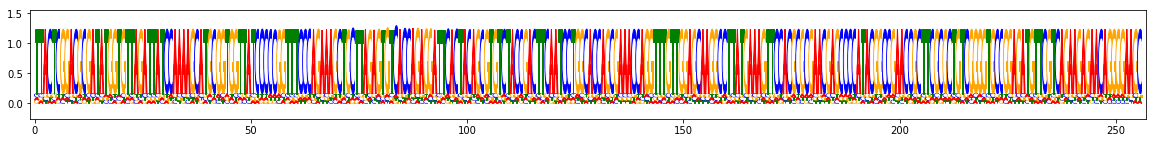

Bias Activation: -1.88775157928
Model Prediction: 0.0385103
Masked average prediciton difference


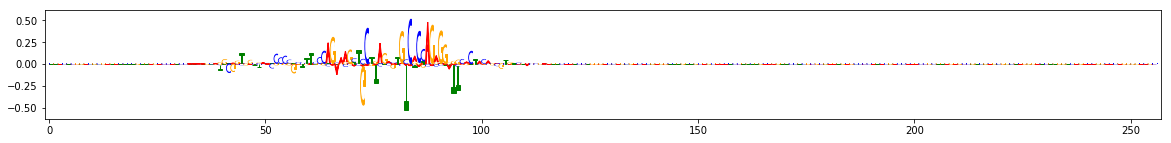

Information Content of Softmax prediction difference


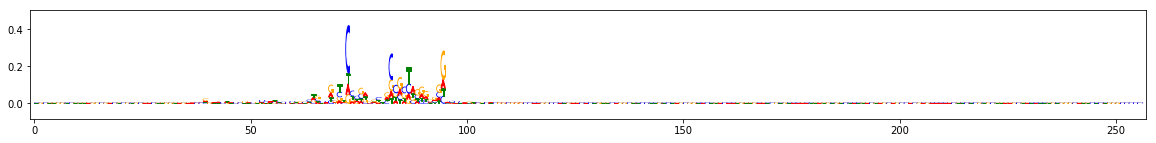

Weighted log-odds of the Sequence Distribution


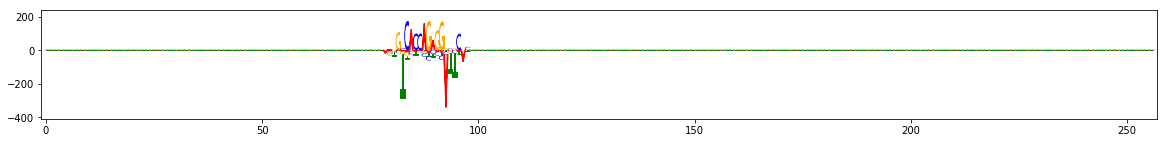

PWM score: -17.9704340756


In [5]:
dream = sigmodel.dream(seq, viz=False, num_iterations = 40, step=1)

print('initial sequence')
seq.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(seq)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(seq.discrete_seq()))[0][0]))
sigmodel.get_importance(seq, viz=True)
print('PWM score: ' + str(seq.find_pwm(viz=True)[2]))

print('final sequence')
dream.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(dream)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(dream.discrete_seq()))[0][0]))
sigmodel.get_importance(dream, viz=True)
print('PWM score: ' + str(dream.find_pwm(viz=True)[2]))